In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np

In [5]:
(x_train, y_train) , ( x_test , y_test)=keras.datasets.mnist.load_data()

In [14]:
len(x_train)

60000

In [15]:
len(x_test)

10000

In [17]:
x_train[:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [18]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

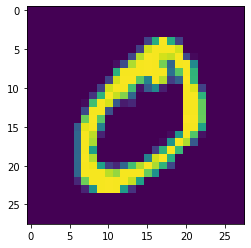

In [19]:
plt.imshow(x_train[1])

In [26]:
classes = ["zero","one","two","three","four","five","six","seven","eight","nine","ten"]

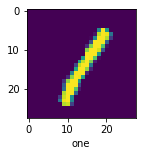

In [31]:
def plot_sample(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])
plot_sample(x_train,y_train,23)

In [32]:
x_train = x_train/255.0
x_test = x_test/255.0

In [33]:
x_train.shape

(60000, 28, 28)

In [39]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [41]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1325 - accuracy: 0.9594
Epoch 2/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0446 - accuracy: 0.9861
Epoch 3/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0301 - accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0217 - accuracy: 0.9929
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0162 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0134 - accuracy: 0.9955
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0096 - accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0095 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0073 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 60s 32m

In [42]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0430 - accuracy: 0.9898


[0.042984575033187866, 0.989799976348877]